In [2]:
pip install xgboost


     -------------------------------------- 125.4/125.4 MB 1.6 MB/s eta 0:00:00


In [996]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [997]:
df=pd.read_excel("D:\\GDP\\Needed data For GDP prediction - 16-10-2020-.xlsx",sheet_name='Data')
df

,Time Frame,Date,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployed Rate %,GDP Growth (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,الربع الأول 2002/2001,2001-09-30,387.63,71.64,76.91,97.57,438.61,NaN,2.165570,295.053,759.2,-,-,NaN,-,-,-,NaN,NaN,NaN,NaN,NaN
1,الربع الثاني 2002/2001,2001-12-31,401.86,76.87,78.82,103.14,454.41,NaN,2.320502,297.549,783.7,-,-,NaN,-,-,-,NaN,NaN,NaN,NaN,NaN
2,الربع الثالث 2002/2001,2002-03-31,421.28,79.87,91.36,105.97,486.53,NaN,2.603037,305.646,655.2,-,-,NaN,-,-,-,NaN,NaN,NaN,NaN,NaN
3,الربع الرابع 2002/2001,2002-06-30,382.49,105.10,91.96,112.17,467.38,NaN,2.644360,329.800,754.4,-,-,NaN,-,-,-,NaN,NaN,NaN,NaN,NaN
4,الربع الأول 2003/2002,2002-09-30,407.09,68.82,91.62,114.42,453.11,NaN,2.736786,343.555,738.4,-,2.9,NaN,-,-,-,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,الربع الأول 2022/2021,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,5.891552,NaN,8145.9,7.5,9.8,49.266667,53.9,54.5,54.3,NaN,NaN,NaN,NaN,NaN
81,الربع الثاتي 2022/2021,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,5.887123,NaN,7437.2,7.4,8.3,48.800000,54.5,54.2,55.3,NaN,NaN,NaN,NaN,NaN
82,الربع الثالث 2022/2021,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,8.849226,NaN,8045.7,7.2,5.4,47.500000,52.4,53.3,52.8,NaN,NaN,NaN,NaN,NaN
83,الربع الراابع 2021/2022,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,NaN,46.366667,52,52.3,52.7,NaN,NaN,NaN,NaN,NaN


In [998]:
df.replace(to_replace='-',value=np.nan,inplace=True)

In [999]:
df.isna().sum()

Time Frame                                                                                        0
Date                                                                                              0
Total Final consumption at market prices & constant  prices (L.E B.)                              5
Total investment and stock  at market prices & constant  prices (L.E B.)                          5
Exports of goods and services (L.E B.)                                                            5
Imports of goods and services (L.E B.)                                                            5
GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)     5
GDP Per Capita (000 $)                                                                           43
Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF                                     2
Total Domestic Debt\n(L.E B.)\nCBE                                                                9


In [1000]:
#df.drop(df.columns[[10,11]],axis=1,inplace=True)

In [1001]:
df = df.fillna(df.median())
df

,Time Frame,Date,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployed Rate %,GDP Growth (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,الربع الأول 2002/2001,2001-09-30,387.63,71.64,76.910,97.570,438.610,9231.043905,2.165570,295.053,759.2,10.485,5.05,49.050000,52.7,52.3,52.75,NaN,NaN,NaN,NaN,17.0
1,الربع الثاني 2002/2001,2001-12-31,401.86,76.87,78.820,103.140,454.410,9231.043905,2.320502,297.549,783.7,10.485,5.05,49.050000,52.7,52.3,52.75,NaN,NaN,NaN,NaN,17.0
2,الربع الثالث 2002/2001,2002-03-31,421.28,79.87,91.360,105.970,486.530,9231.043905,2.603037,305.646,655.2,10.485,5.05,49.050000,52.7,52.3,52.75,NaN,NaN,NaN,NaN,17.0
3,الربع الرابع 2002/2001,2002-06-30,382.49,105.10,91.960,112.170,467.380,9231.043905,2.644360,329.800,754.4,10.485,5.05,49.050000,52.7,52.3,52.75,NaN,NaN,NaN,NaN,17.0
4,الربع الأول 2003/2002,2002-09-30,407.09,68.82,91.620,114.420,453.110,9231.043905,2.736786,343.555,738.4,10.485,2.90,49.050000,52.7,52.3,52.75,NaN,NaN,NaN,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,الربع الأول 2022/2021,2021-09-30,641.24,118.52,147.355,183.215,722.365,9231.043905,5.891552,982.102,8145.9,7.500,9.80,49.266667,53.9,54.5,54.30,NaN,NaN,NaN,NaN,17.0
81,الربع الثاتي 2022/2021,2021-12-31,641.24,118.52,147.355,183.215,722.365,9231.043905,5.887123,982.102,7437.2,7.400,8.30,48.800000,54.5,54.2,55.30,NaN,NaN,NaN,NaN,17.0
82,الربع الثالث 2022/2021,2022-03-31,641.24,118.52,147.355,183.215,722.365,9231.043905,8.849226,982.102,8045.7,7.200,5.40,47.500000,52.4,53.3,52.80,NaN,NaN,NaN,NaN,17.0
83,الربع الراابع 2021/2022,2022-06-30,641.24,118.52,147.355,183.215,722.365,9231.043905,9.551989,982.102,4067.0,7.200,5.05,46.366667,52.0,52.3,52.70,NaN,NaN,NaN,NaN,17.0


In [1002]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [1003]:
#df.shift(periods=3, fill_value=0).tail()

In [1004]:
#print(df.shift(periods=2, fill_value=0))

In [1005]:
#df.shift(-1)

In [1009]:
df.drop('Time Frame',axis=1,inplace=True)

KeyError: "['Time Frame'] not found in axis"

In [1010]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new=scaler.fit_transform(df)

In [1011]:
df_new

array([[0.01286891, 0.08883249, 0.        , ...,        nan,        nan,
        0.        ],
       [0.03461768, 0.12787399, 0.0121889 , ...,        nan,        nan,
        0.        ],
       [0.06429871, 0.15026874, 0.09221442, ...,        nan,        nan,
        0.        ],
       ...,
       [0.40047991, 0.4387877 , 0.44955329, ...,        nan,        nan,
        0.        ],
       [0.40047991, 0.4387877 , 0.44955329, ...,        nan,        nan,
        0.        ],
       [0.40047991, 0.4387877 , 0.44955329, ...,        nan,        nan,
        0.        ]])

In [1012]:
df[df.columns] = scaler.fit_transform(df[df.columns])

In [1013]:
df

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployed Rate %,GDP Growth (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
Date,,,,,,,,,,,,,,,,,,,,
2001-09-30,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2001-12-31,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-03-31,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-06-30,0.005013,0.338609,0.096043,0.069054,0.045835,0.364448,0.015970,0.007813,0.013243,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-09-30,0.042611,0.067781,0.093874,0.079695,0.023101,0.364448,0.019053,0.010907,0.011107,0.529839,0.510638,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,0.400480,0.438788,0.449553,0.405075,0.452062,0.364448,0.124281,0.154495,1.000000,0.048387,1.000000,0.923944,0.838235,0.896,0.834821,NaN,NaN,NaN,NaN,0.0
2021-12-31,0.400480,0.438788,0.449553,0.405075,0.452062,0.364448,0.124133,0.154495,0.905389,0.032258,0.893617,0.884507,0.867647,0.872,0.879464,NaN,NaN,NaN,NaN,0.0
2022-03-31,0.400480,0.438788,0.449553,0.405075,0.452062,0.364448,0.222934,0.154495,0.986623,0.000000,0.687943,0.774648,0.764706,0.800,0.767857,NaN,NaN,NaN,NaN,0.0


In [1014]:
df.shape[0]

85

In [1015]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	#if dropnan:
		#agg.dropna(inplace=True)
	return agg


raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data = series_to_supervised(df,4,1)
#print(data)

In [1016]:
data

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var12(t-4),var13(t-4),var14(t-4),var15(t-4),var16(t-4),var17(t-4),var18(t-4),var19(t-4),var20(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var12(t-3),var13(t-3),var14(t-3),var15(t-3),var16(t-3),var17(t-3),var18(t-3),var19(t-3),var20(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var12(t-2),var13(t-2),var14(t-2),var15(t-2),var16(t-2),var17(t-2),var18(t-2),var19(t-2),var20(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.005013,0.338609,0.096043,0.069054,0.045835,0.364448,0.015970,0.007813,0.013243,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-09-30,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.005013,0.338609,0.096043,0.069054,0.045835,0.3

In [1017]:
df

,Total Final consumption at market prices & constant prices (L.E B.),Total investment and stock at market prices & constant prices (L.E B.),Exports of goods and services (L.E B.),Imports of goods and services (L.E B.),GDP at cat market prices & constant prices (L.E B.)\n(Consumption+Investment+Exports-Imorts),GDP Per Capita (000 $),"Inflation Rate, annually change (%) (Total Egypt) - IFS, IMF",Total Domestic Debt\n(L.E B.)\nCBE,Workers Remittance ($ Million),Unemployed Rate %,GDP Growth (%),Egypt's Purchasing Managers' Index,Global JP MORGAN PMI: COMPOSITE - S&P Global,Global JP MORGAN PMI: Manufacturing- S&P Global,Global JP MORGAN PMI: ٍServices - S&P Global,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
Date,,,,,,,,,,,,,,,,,,,,
2001-09-30,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2001-12-31,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-03-31,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-06-30,0.005013,0.338609,0.096043,0.069054,0.045835,0.364448,0.015970,0.007813,0.013243,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-09-30,0.042611,0.067781,0.093874,0.079695,0.023101,0.364448,0.019053,0.010907,0.011107,0.529839,0.510638,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,0.400480,0.438788,0.449553,0.405075,0.452062,0.364448,0.124281,0.154495,1.000000,0.048387,1.000000,0.923944,0.838235,0.896,0.834821,NaN,NaN,NaN,NaN,0.0
2021-12-31,0.400480,0.438788,0.449553,0.405075,0.452062,0.364448,0.124133,0.154495,0.905389,0.032258,0.893617,0.884507,0.867647,0.872,0.879464,NaN,NaN,NaN,NaN,0.0
2022-03-31,0.400480,0.438788,0.449553,0.405075,0.452062,0.364448,0.222934,0.154495,0.986623,0.000000,0.687943,0.774648,0.764706,0.800,0.767857,NaN,NaN,NaN,NaN,0.0


In [1057]:
train = data.loc[data.index < '2021-3-31']
test = data.loc[data.index >= '2021-3-31']

In [1058]:
train

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var12(t-4),var13(t-4),var14(t-4),var15(t-4),var16(t-4),var17(t-4),var18(t-4),var19(t-4),var20(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var12(t-3),var13(t-3),var14(t-3),var15(t-3),var16(t-3),var17(t-3),var18(t-3),var19(t-3),var20(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var12(t-2),var13(t-2),var14(t-2),var15(t-2),var16(t-2),var17(t-2),var18(t-2),var19(t-2),var20(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.005013,0.338609,0.096043,0.069054,0.045835,0.364448,0.015970,0.007813,0.013243,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-09-30,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.005013,0.338609,0.096043,0.069054,0.045835,0.3

In [1059]:
len(test) , len(train)

(7, 78)

In [1060]:
FEATURES = data.columns.drop('var11(t)')
TARGET = 'var11(t)'
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [1061]:
FEATURES,X_train

(Index(['var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var5(t-4)',
        'var6(t-4)', 'var7(t-4)', 'var8(t-4)', 'var9(t-4)', 'var10(t-4)',
        'var11(t-4)', 'var12(t-4)', 'var13(t-4)', 'var14(t-4)', 'var15(t-4)',
        'var16(t-4)', 'var17(t-4)', 'var18(t-4)', 'var19(t-4)', 'var20(t-4)',
        'var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)',
        'var6(t-3)', 'var7(t-3)', 'var8(t-3)', 'var9(t-3)', 'var10(t-3)',
        'var11(t-3)', 'var12(t-3)', 'var13(t-3)', 'var14(t-3)', 'var15(t-3)',
        'var16(t-3)', 'var17(t-3)', 'var18(t-3)', 'var19(t-3)', 'var20(t-3)',
        'var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
        'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)', 'var10(t-2)',
        'var11(t-2)', 'var12(t-2)', 'var13(t-2)', 'var14(t-2)', 'var15(t-2)',
        'var16(t-2)', 'var17(t-2)', 'var18(t-2)', 'var19(t-2)', 'var20(t-2)',
        'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
        'var6(t-1)

In [1062]:
len(X_test)

7

In [1063]:
len(X_train)

78

In [1064]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.1,n_jobs=-1)
reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

[15:06:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.18135	validation_1-rmse:0.29787
[1]	validation_0-rmse:0.16740	validation_1-rmse:0.29863
[2]	validation_0-rmse:0.15486	validation_1-rmse:0.29994
[3]	validation_0-rmse:0.14357	validation_1-rmse:0.30120
[4]	validation_0-rmse:0.13292	validation_1-rmse:0.29544
[5]	validation_0-rmse:0.12337	validation_1-rmse:0.29016
[6]	validation_0-rmse:0.11474	validation_1-rmse:0.29057
[7]	validation_0-rmse:0.10638	validation_1-rmse:0.28032
[8]	validation_0-rmse:0.09925	validation_1-rmse:0.28141
[9]	validation_0-rmse:0.09290	validation_1-rmse:0.28251
[10]	validation_0-rmse:0.08730	validation_1-rmse:0.28344
[11]	validation_0-rmse:0.08202	validation_1-rmse:0.28436
[12]	validation_0-rmse:0.07690	validation_1-rmse:0.28463
[13]	validation_0-rmse:0.07208	validation_1-rmse:0.28678
[14]	validation_0-rmse:0.06815	vali

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [1065]:
y_pred=reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.2803225887455467

In [1066]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)*100

27.651057170302646

In [1067]:
test['y_pred']=reg.predict(X_test)

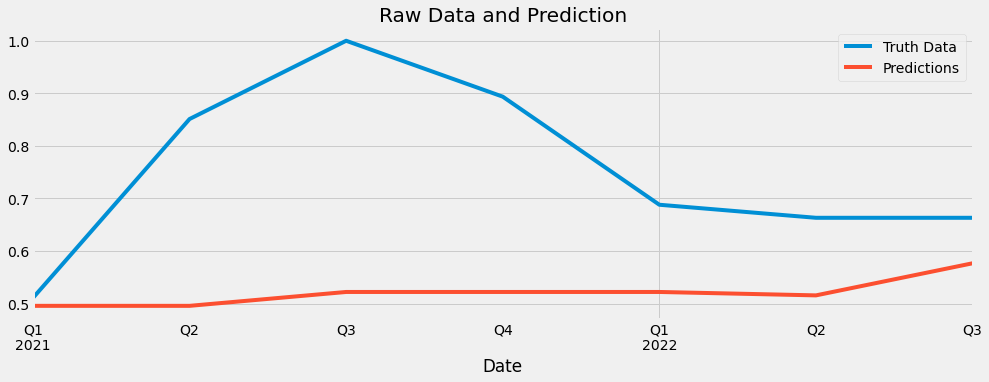

In [1068]:
ax = test[['var11(t)']].plot(style='-',figsize=(15, 5))
test['y_pred'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [1069]:
test[['y_pred','var11(t)']]

,y_pred,var11(t)
Date,,
2021-03-31,0.495564,0.510638
2021-06-30,0.495564,0.851064
2021-09-30,0.521977,1.000000
2021-12-31,0.521977,0.893617
2022-03-31,0.521977,0.687943
2022-06-30,0.515480,0.663121
2022-09-30,0.576556,0.663121


In [1070]:
FEATURES=data.columns.drop('var11(t)')
FEATURES

Index(['var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var5(t-4)',
       'var6(t-4)', 'var7(t-4)', 'var8(t-4)', 'var9(t-4)', 'var10(t-4)',
       'var11(t-4)', 'var12(t-4)', 'var13(t-4)', 'var14(t-4)', 'var15(t-4)',
       'var16(t-4)', 'var17(t-4)', 'var18(t-4)', 'var19(t-4)', 'var20(t-4)',
       'var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)',
       'var6(t-3)', 'var7(t-3)', 'var8(t-3)', 'var9(t-3)', 'var10(t-3)',
       'var11(t-3)', 'var12(t-3)', 'var13(t-3)', 'var14(t-3)', 'var15(t-3)',
       'var16(t-3)', 'var17(t-3)', 'var18(t-3)', 'var19(t-3)', 'var20(t-3)',
       'var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
       'var6(t-2)', 'var7(t-2)', 'var8(t-2)', 'var9(t-2)', 'var10(t-2)',
       'var11(t-2)', 'var12(t-2)', 'var13(t-2)', 'var14(t-2)', 'var15(t-2)',
       'var16(t-2)', 'var17(t-2)', 'var18(t-2)', 'var19(t-2)', 'var20(t-2)',
       'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)'

In [1071]:
train[FEATURES]

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var12(t-4),var13(t-4),var14(t-4),var15(t-4),var16(t-4),var17(t-4),var18(t-4),var19(t-4),var20(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var12(t-3),var13(t-3),var14(t-3),var15(t-3),var16(t-3),var17(t-3),var18(t-3),var19(t-3),var20(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var12(t-2),var13(t-2),var14(t-2),var15(t-2),var16(t-2),var17(t-2),var18(t-2),var19(t-2),var20(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.005013,0.338609,0.096043,0.069054,0.045835,0.364448,0.015970,0.007813,0.013243,0.529839,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0
2002-09-30,0.012869,0.088832,0.000000,0.000000,0.000000,0.364448,0.000000,0.000000,0.013884,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.034618,0.127874,0.012189,0.026344,0.025172,0.364448,0.005168,0.000561,0.017155,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.064299,0.150269,0.092214,0.039729,0.076343,0.364448,0.014592,0.002382,0.000000,0.529839,0.663121,0.905634,0.779412,0.720,0.765625,NaN,NaN,NaN,NaN,0.0,0.005013,0.338609,0.096043,0.069054,0.045835,0.364448,0.015970,0.007813,0.013243,0.529839,0.66

In [1072]:
FEATURES=data.columns.drop('var11(t)')
FEATURES=train[FEATURES]
TARGET='var11(t)'
for train_idx, val_idx in tss.split(data):
    #print(train_idx)
    print(val_idx)
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    #FEATURES=train[FEATURES]
    #TARGET='var11(t)'
train
test

[45 46 47 48 49 50 51 52 53 54]
[55 56 57 58 59 60 61 62 63 64]
[65 66 67 68 69 70 71 72 73 74]
[75 76 77 78 79 80 81 82 83 84]


,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var12(t-4),var13(t-4),var14(t-4),var15(t-4),var16(t-4),var17(t-4),var18(t-4),var19(t-4),var20(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var12(t-3),var13(t-3),var14(t-3),var15(t-3),var16(t-3),var17(t-3),var18(t-3),var19(t-3),var20(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var12(t-2),var13(t-2),var14(t-2),var15(t-2),var16(t-2),var17(t-2),var18(t-2),var19(t-2),var20(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var19(t-1),var20(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-30,0.809870,1.000000,0.564710,0.772029,0.906164,0.861965,0.332279,0.896562,0.731801,0.048387,0.709220,0.935211,0.730392,0.576,0.750000,NaN,NaN,NaN,NaN,0.0,0.739565,0.748432,0.568539,0.545949,0.856298,0.678155,0.159076,0.875487,0.808656,0.096774,0.702128,0.973239,0.710784,0.512,0.727679,NaN,NaN,NaN,NaN,0.0,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,NaN,NaN,NaN,NaN,0.0,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,NaN,NaN,NaN,NaN,0.0,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,NaN,NaN,NaN,NaN,0.0
2020-09-30,0.739565,0.748432,0.568539,0.545949,0.856298,0.678155,0.159076,0.875487,0.808656,0.096774,0.702128,0.973239,0.710784,0.512,0.727679,NaN,NaN,NaN,NaN,0.0,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,NaN,NaN,NaN,NaN,0.0,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,NaN,NaN,NaN,NaN,0.0,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,NaN,NaN,NaN,NaN,0.0,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286,NaN,NaN,NaN,NaN,0.0
2020-12-31,0.813844,0.711108,0.440906,0.522301,0.901862,0.800569,0.080957,0.913372,0.808656,0.129032,0.702128,0.853521,0.705882,0.544,0.709821,NaN,NaN,NaN,NaN,0.0,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,NaN,NaN,NaN,NaN,0.0,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,NaN,NaN,NaN,NaN,0.0,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286,NaN,NaN,NaN,NaN,0.0,0.914258,0.448343,0.188194,0.385139,0.933566,0.819782,0.101676,0.154495,0.912879,0.000000,0.446809,1.000000,0.794118,0.824,0.745536,NaN,NaN,NaN,NaN,0.0
2021-03-31,0.860765,0.673783,0.504722,0.597976,0.933247,0.881246,0.122902,0.946004,0.963034,0.080645,0.659574,0.628169,0.441176,0.400,0.441964,NaN,NaN,NaN,NaN,0.0,0.977227,0.170648,0.052265,0.466963,0.878443,0.683839,0.107893,1.000000,0.963034,0.387097,0.184397,0.000000,0.000000,0.000,0.000000,NaN,NaN,NaN,NaN,0.0,0.883996,0.249776,0.133312,0.323653,0.866654,0.625914,0.052954,0.154495,0.984274,0.016129,0.354610,0.969014,0.745098,0.664,0.714286,NaN,NaN,NaN,NaN,0.0,0.914258,0.448343,0.188194,0.385139,0.933566,0.819782,0.101676,0.154495,0.912879,0.000000,0.446809,

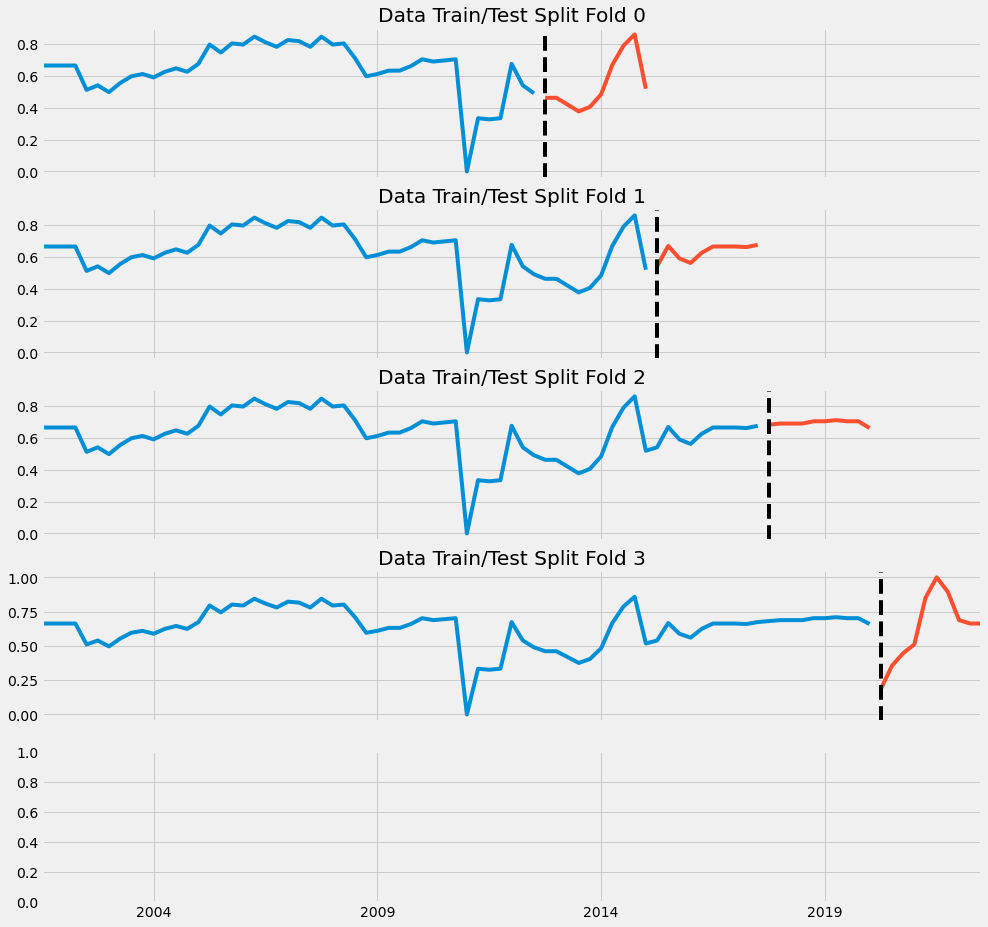

In [1073]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(data):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    train['var11(t)'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['var11(t)'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [1077]:
tss = TimeSeriesSplit(n_splits=4,test_size=10, gap=0)
data = data.sort_index()

FEATURES=data.columns.drop('var11(t)')
fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(data):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]

    #train = create_features(train)
    #test = create_features(test)

    FEATURES=FEATURES=data.columns.drop('var11(t)')
    TARGET='var11(t)'
    
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.1)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=1)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[15:18:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.19606	validation_1-rmse:0.15824
[1]	validation_0-rmse:0.17977	validation_1-rmse:0.15333
[2]	validation_0-rmse:0.16510	validation_1-rmse:0.14890
[3]	validation_0-rmse:0.15184	validation_1-rmse:0.14616
[4]	validation_0-rmse:0.13940	validation_1-rmse:0.14621
[5]	validation_0-rmse:0.12850	validation_1-rmse:0.14491
[6]	validation_0-rmse:0.11822	validation_1-rmse:0.14496
[7]	validation_0-rmse:0.10891	validation_1-rmse:0.14501
[8]	validation_0-rmse:0.10044	validation_1-rmse:0.14506
[9]	validation_0-rmse:0.09275	validation_1-rmse:0.14510
[10]	validation_0-rmse:0.08584	validation_1-rmse:0.14527
[11]	validation_0-rmse:0.07942	validation_1-rmse:0.14486
[12]	validation_0-rmse:0.07344	validation_1-rmse:0.14491
[13]	validation_0-rmse:0.06803	validation_1-rmse:0.14496
[14]	validation_0-rmse:0.06336	vali

[73]	validation_0-rmse:0.00635	validation_1-rmse:0.04115
[74]	validation_0-rmse:0.00614	validation_1-rmse:0.04102
[75]	validation_0-rmse:0.00597	validation_1-rmse:0.04109
[76]	validation_0-rmse:0.00583	validation_1-rmse:0.04103
[77]	validation_0-rmse:0.00569	validation_1-rmse:0.04114
[78]	validation_0-rmse:0.00557	validation_1-rmse:0.04104
[79]	validation_0-rmse:0.00538	validation_1-rmse:0.04103
[80]	validation_0-rmse:0.00526	validation_1-rmse:0.04116
[81]	validation_0-rmse:0.00501	validation_1-rmse:0.04100
[82]	validation_0-rmse:0.00486	validation_1-rmse:0.04104
[83]	validation_0-rmse:0.00475	validation_1-rmse:0.04115
[84]	validation_0-rmse:0.00455	validation_1-rmse:0.04124
[85]	validation_0-rmse:0.00441	validation_1-rmse:0.04117
[86]	validation_0-rmse:0.00428	validation_1-rmse:0.04129
[87]	validation_0-rmse:0.00415	validation_1-rmse:0.04123
[88]	validation_0-rmse:0.00401	validation_1-rmse:0.04131
[89]	validation_0-rmse:0.00393	validation_1-rmse:0.04138
[90]	validation_0-rmse:0.00382	

[45]	validation_0-rmse:0.01535	validation_1-rmse:0.24129
[46]	validation_0-rmse:0.01508	validation_1-rmse:0.24128
[47]	validation_0-rmse:0.01477	validation_1-rmse:0.24127
[48]	validation_0-rmse:0.01413	validation_1-rmse:0.24114
[49]	validation_0-rmse:0.01384	validation_1-rmse:0.24113
[50]	validation_0-rmse:0.01347	validation_1-rmse:0.24108
[51]	validation_0-rmse:0.01297	validation_1-rmse:0.24107
[52]	validation_0-rmse:0.01253	validation_1-rmse:0.24183
[53]	validation_0-rmse:0.01218	validation_1-rmse:0.24178
[54]	validation_0-rmse:0.01198	validation_1-rmse:0.24175
[55]	validation_0-rmse:0.01168	validation_1-rmse:0.24171
[56]	validation_0-rmse:0.01135	validation_1-rmse:0.24240
[57]	validation_0-rmse:0.01102	validation_1-rmse:0.24206
[58]	validation_0-rmse:0.01085	validation_1-rmse:0.24206
[59]	validation_0-rmse:0.01054	validation_1-rmse:0.24270
[60]	validation_0-rmse:0.01039	validation_1-rmse:0.24270
[61]	validation_0-rmse:0.01015	validation_1-rmse:0.24263
[62]	validation_0-rmse:0.00998	

In [1078]:
print(f'Score across folds {np.mean(scores):0.5f}')
print(f'Fold scores:{scores}')

Score across folds 0.11573
Fold scores:[0.14398431248861188, 0.0386851314286323, 0.041205254905766056, 0.2390311666975765]


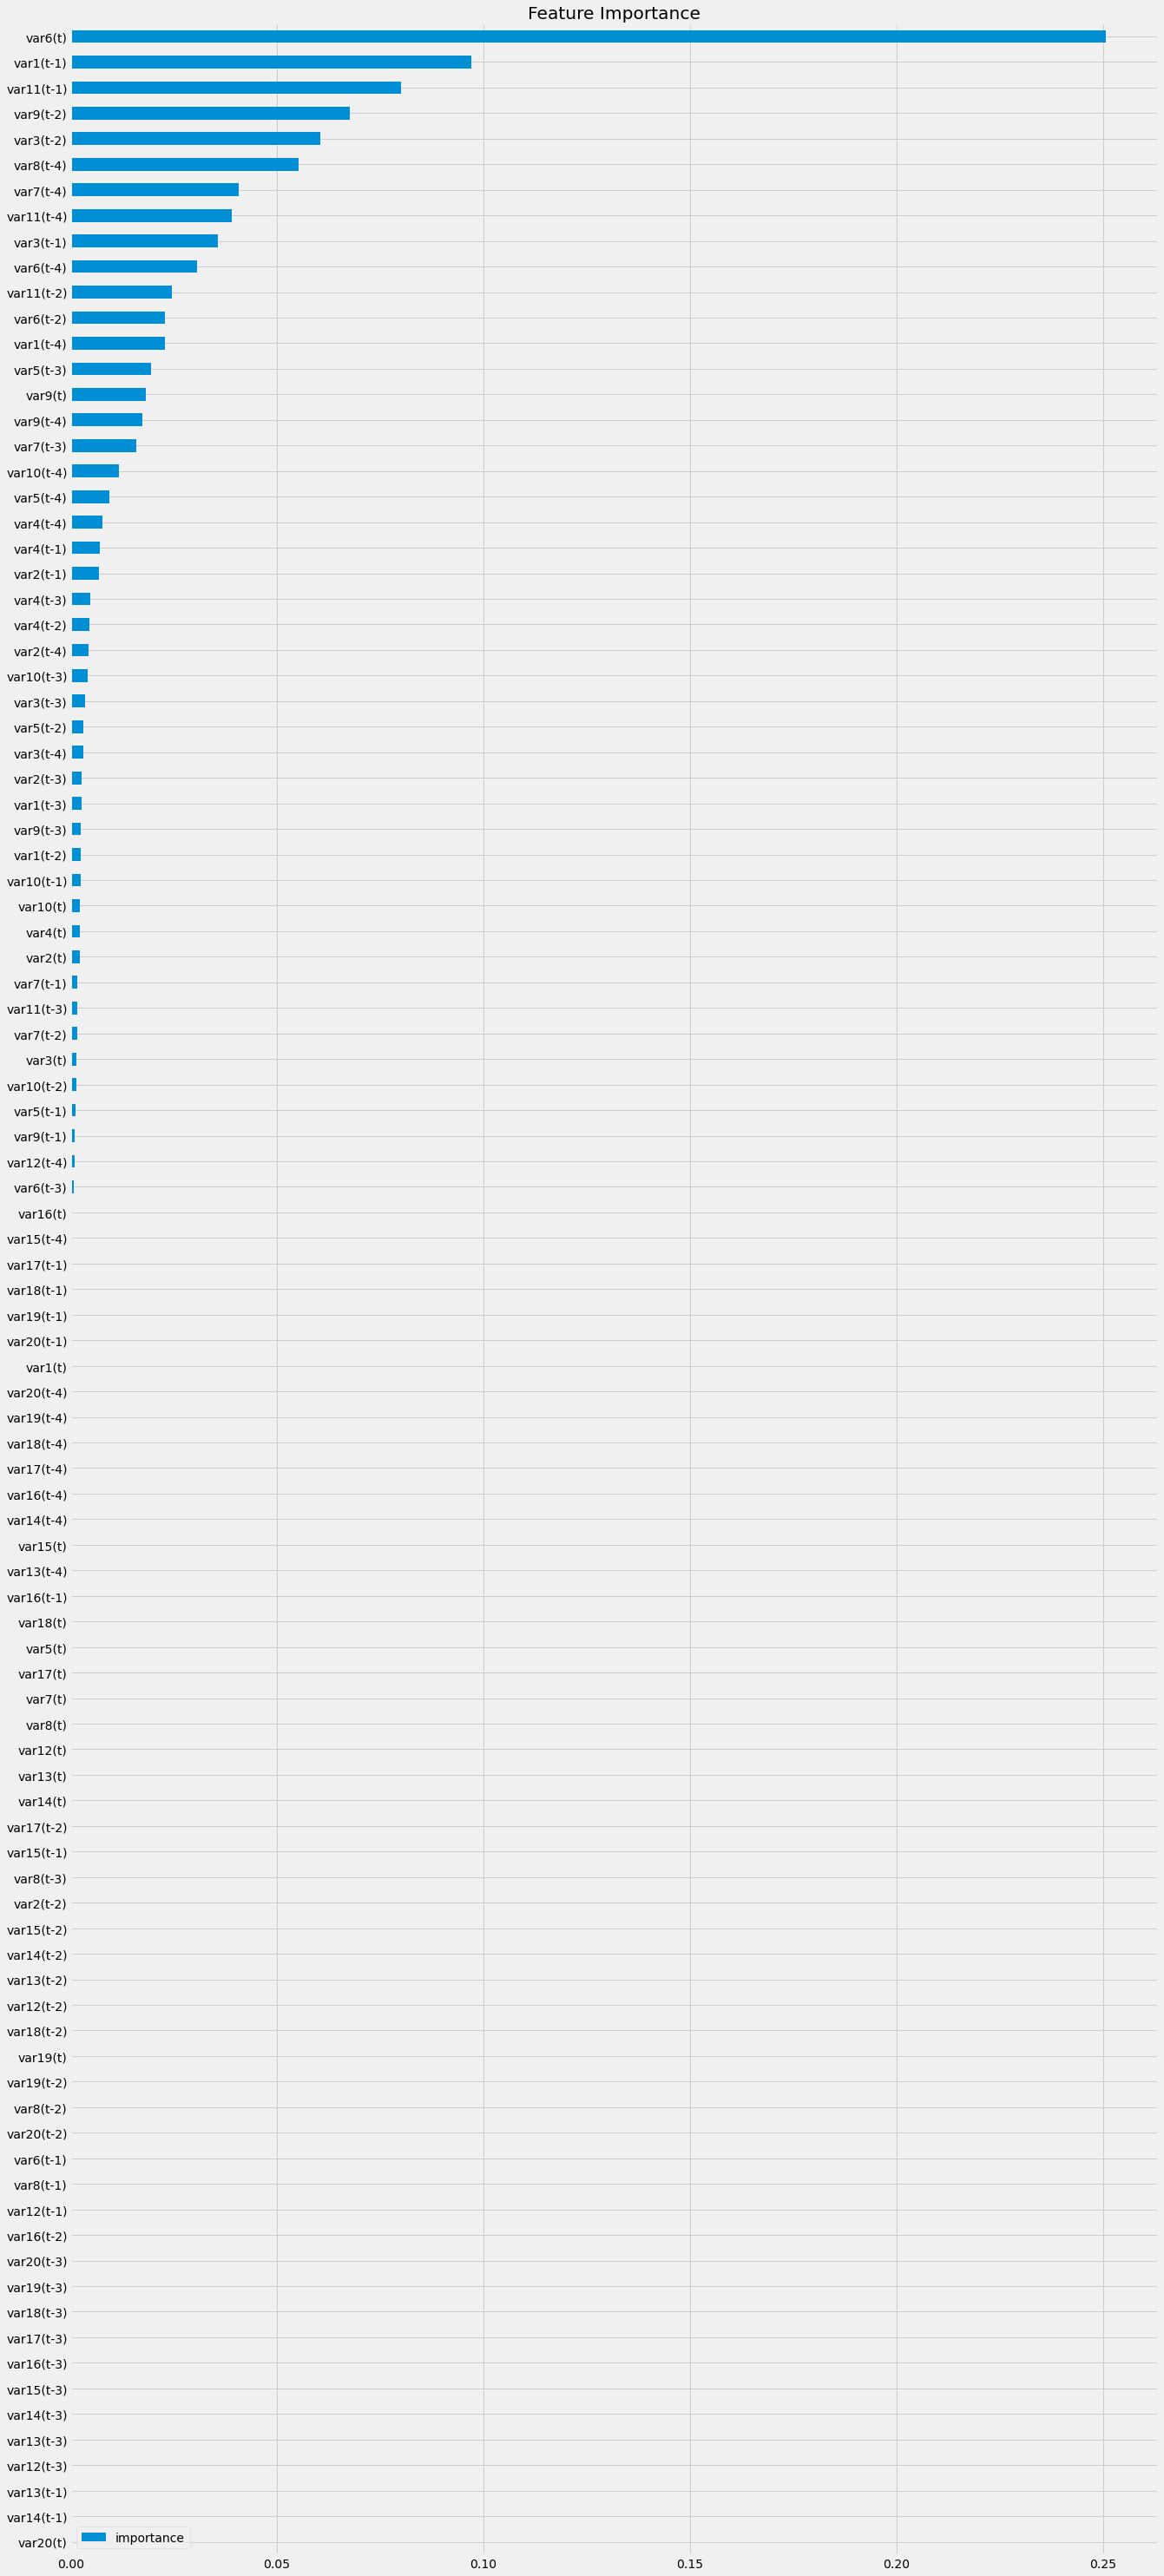

In [1079]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance',figsize=(20,50))
plt.show()